In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [25]:
import numpy as np
import pandas as pd
iris=pd.read_csv("Iris_external.csv")
iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
137,6.4,3.1,5.5,1.8,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

We tested here null values from .info and .isnull both the methods. And conclusion is info is showing 150 count in each 
variable and isnull also showing that none of the variable has any null or missing value. Hence no need to treat missing values

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(iris['Class'])
le.classes_
iris['ClassNum']=le.transform(iris['Class']) #added new column for numeric classes
iris.sample(15)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,ClassNum
32,5.2,4.1,1.5,0.1,Iris-setosa,0
87,6.3,2.3,4.4,1.3,Iris-versicolor,1
128,6.4,2.8,5.6,2.1,Iris-virginica,2
22,4.6,3.6,1.0,0.2,Iris-setosa,0
26,5.0,3.4,1.6,0.4,Iris-setosa,0
125,7.2,3.2,6.0,1.8,Iris-virginica,2
113,5.7,2.5,5.0,2.0,Iris-virginica,2
45,4.8,3.0,1.4,0.3,Iris-setosa,0
137,6.4,3.1,5.5,1.8,Iris-virginica,2
43,5.0,3.5,1.6,0.6,Iris-setosa,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [35]:
correlation=iris.corr() # Here target variable is ClassNum and rest all fields are independent variables.
correlation

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),ClassNum
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
ClassNum,0.782561,-0.419446,0.949043,0.956464,1.000000


#Since there is no ClassNum correlation value is in range -0.1 to 0.1 hence no need to drop any features set.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [39]:
iris.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
ClassNum                0.671141
dtype: float64

#Since there is no independent variable variance value is in <0.1 hence no need to drop variable.

## Question 6

*Plot the scatter matrix for all the variables.*

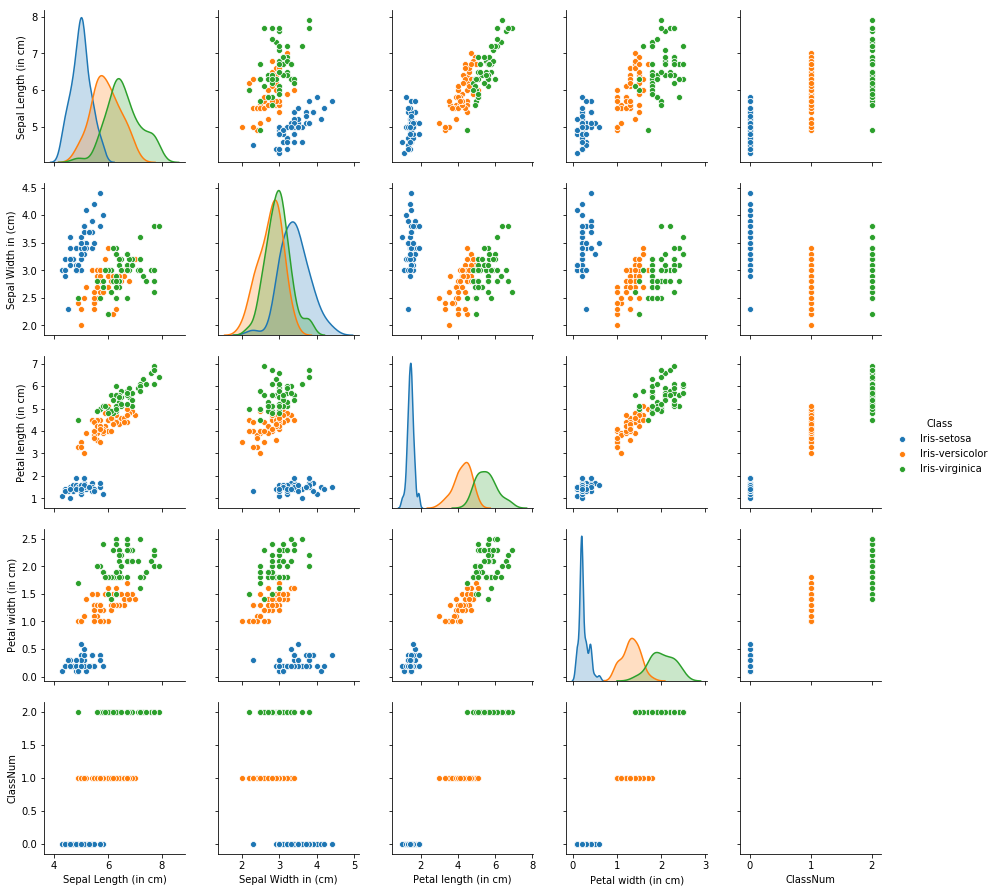

In [42]:
import seaborn as sns
sns.pairplot(iris,hue='Class')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [51]:
#Defining X
X=iris.drop(columns=['Class','ClassNum'])
X.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
36,5.5,3.5,1.3,0.2
126,6.2,2.8,4.8,1.8
12,4.8,3.0,1.4,0.1
76,6.8,2.8,4.8,1.4
26,5.0,3.4,1.6,0.4


In [52]:
#Defining y
y=iris['Class']
y.sample(5)

101     Iris-virginica
2          Iris-setosa
27         Iris-setosa
15         Iris-setosa
78     Iris-versicolor
Name: Class, dtype: object

In [57]:
#Split data into train and test into 80-20 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [64]:
#Frist scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [72]:
#Building the model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
print("Training Accuracy using accuracy score for K=3")
train_pred = knn.predict(scaledX_train)
print(accuracy_score(y_train,train_pred))
print("Training Accuracy using score  for K=3")
print(knn.score(scaledX_train,y_train))
print("Testing Accuracy using accuracy score  for K=3")
test_pred = knn.predict(scaledX_test)
print(accuracy_score(y_test,test_pred))
print("Testing Accuracy using score  for K=3")
print(knn.score(scaledX_test,y_test))

Training Accuracy using accuracy score for K=3
0.95
Training Accuracy using score  for K=3
0.95
Testing Accuracy using accuracy score  for K=3
1.0
Testing Accuracy using score  for K=3
1.0


In [74]:
#For K=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
print("Training Accuracy using accuracy score for K=5")
train_pred = knn.predict(scaledX_train)
print(accuracy_score(y_train,train_pred))
print("Training Accuracy using score  for K=5")
print(knn.score(scaledX_train,y_train))
print("Testing Accuracy using accuracy score  for K=5")
test_pred = knn.predict(scaledX_test)
print(accuracy_score(y_test,test_pred))
print("Testing Accuracy using score  for K=5")
print(knn.score(scaledX_test,y_test))

Training Accuracy using accuracy score for K=5
0.9583333333333334
Training Accuracy using score  for K=5
0.9583333333333334
Testing Accuracy using accuracy score  for K=5
0.9666666666666667
Testing Accuracy using score  for K=5
0.9666666666666667


In [76]:
#For K=9
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(scaledX_train,y_train)
print("Training Accuracy using accuracy score for K=9")
train_pred = knn.predict(scaledX_train)
print(accuracy_score(y_train,train_pred))
print("Training Accuracy using score  for K=9")
print(knn.score(scaledX_train,y_train))
print("Testing Accuracy using accuracy score  for K=9")
test_pred = knn.predict(scaledX_test)
print(accuracy_score(y_test,test_pred))
print("Testing Accuracy using score  for K=9")
print(knn.score(scaledX_test,y_test))

Training Accuracy using accuracy score for K=9
0.95
Training Accuracy using score  for K=9
0.95
Testing Accuracy using accuracy score  for K=9
1.0
Testing Accuracy using score  for K=9
1.0


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [154]:
neighbors = np.arange(1,20,2)
# Loop over different values of k
train_accuracy = []
train_MSE = []
test_accuracy = []
test_MSE = []
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy.append(accuracy_score(y_train,knn.predict(scaledX_train)))
    train_MSE.append(1-accuracy_score(y_train,knn.predict(scaledX_train)))
    test_accuracy.append(accuracy_score(y_test,knn.predict(scaledX_test)))
    test_MSE.append(1-accuracy_score(y_test,knn.predict(scaledX_test)))
Test_MSE_Df=pd.DataFrame(data=(neighbors,test_MSE)).T
print("TEST MSE with neighbors")
Test_MSE_Df.columns=['neighbors','test_MSE']
Test_MSE_Df

TEST MSE with neighbors


,neighbors,test_MSE
0,1.0,0.000000
1,3.0,0.000000
2,5.0,0.033333
3,7.0,0.033333
4,9.0,0.000000
5,11.0,0.000000
6,13.0,0.033333
7,15.0,0.033333
8,17.0,0.066667
9,19.0,0.066667


In [153]:
print("Lowest MSE models")
Test_MSE_Df[(Test_MSE_Df['test_MSE']==min(Test_MSE_Df['test_MSE']))]['neighbors']

Lowest MSE models


0     1.0
1     3.0
4     9.0
5    11.0
Name: neighbors, dtype: float64

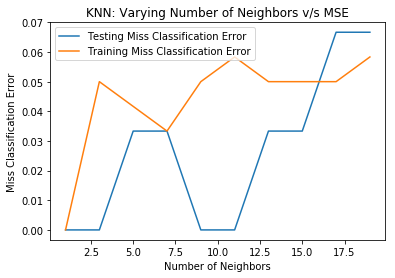

In [145]:
import matplotlib.pyplot as plt
plt.title('Neighbors v/s MSE')
plt.plot(neighbors, test_MSE, label = 'Testing Miss Classification Error')
plt.plot(neighbors, train_MSE, label = 'Training Miss Classification Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Miss Classification Error')
plt.show()

optimal number of beighbour in terms of miss classification error(MSE) where MSE is minimum and difference between testing MSE
and train MSE is minimum.
As per the plotted graph of trained MSE and test MSE data, we see both are showing same MSE at K=1 and K=7. Since K=1 looks 
more like overfitting due to having no error at all, we will choose K=7 as optimal number of neighbour. 

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

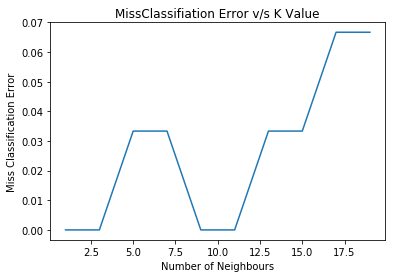

In [155]:
plt.title('MissClassifiation Error v/s K Value')
plt.plot(neighbors, test_MSE)
plt.xlabel('Number of Neighbours')
plt.ylabel('Miss Classification Error')
plt.show()